In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
# ------------------------------
# 1.1. Load and Inspect Data
# ------------------------------
# Load the dataset
df = pd.read_csv('data/Shanghai license plate price - Sheet3.csv')
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces from column names

# Display column names
print("Dataset Columns:")
print(df.columns.tolist())
print("\n")

# Display dataset information
print("Dataset Information:")
df.info()
print("\n")

# Display summary statistics
print("Summary Statistics:")
print(df.describe())
print("\n")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Display first few rows of the dataset
print("First 5 Rows of the Dataset:")
print(df.head())
print("\n")



Dataset Columns:
['Date', 'Total number of license issued', 'lowest price', 'avg price', 'Total number of applicants']


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date                            204 non-null    object
 1   Total number of license issued  204 non-null    int64 
 2   lowest price                    204 non-null    int64 
 3   avg price                       204 non-null    int64 
 4   Total number of applicants      204 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.1+ KB


Summary Statistics:
       Total number of license issued  lowest price     avg price  \
count                      204.000000    204.000000    204.000000   
mean                      7634.323529  53375.000000  54358.044118   
std                       2615.136371  24577.035068  23

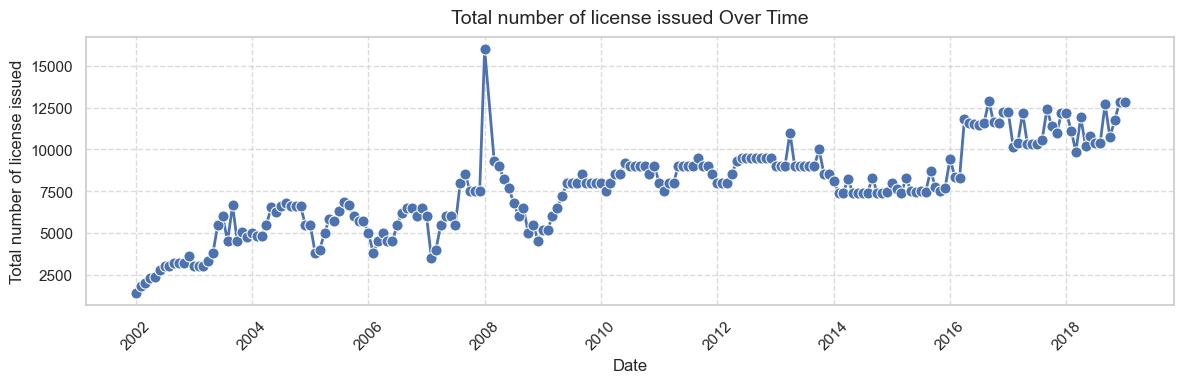

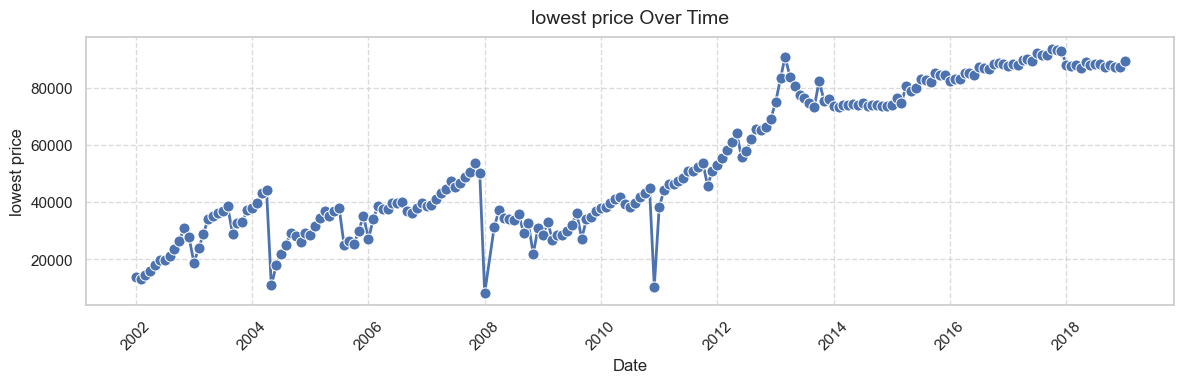

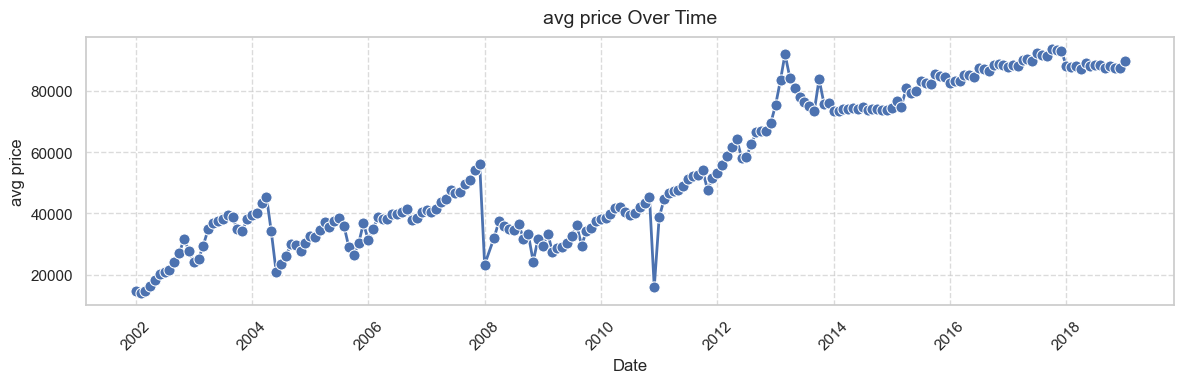

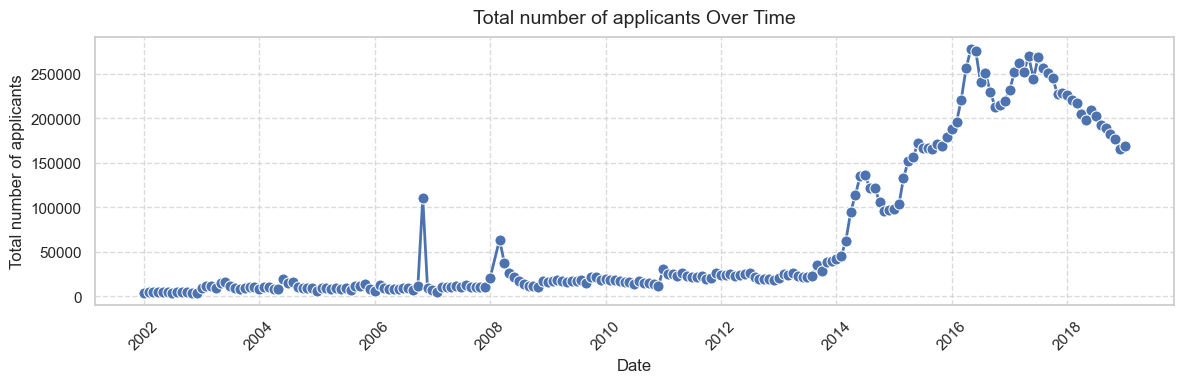

In [47]:
# ------------------------------
# 1.2. Visualize Individual Columns
# ------------------------------
# Set seaborn style for consistent and clean plotting
sns.set(style="whitegrid", rc={'figure.dpi': 100, 'figure.figsize': (12, 4)})

# Plot each numeric column over time
numeric_cols = [col for col in df.columns if col != 'Date']
for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x='Date', y=col, marker='o', linewidth=2, markersize=8)
    plt.title(f'{col} Over Time', fontsize=14, pad=10)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

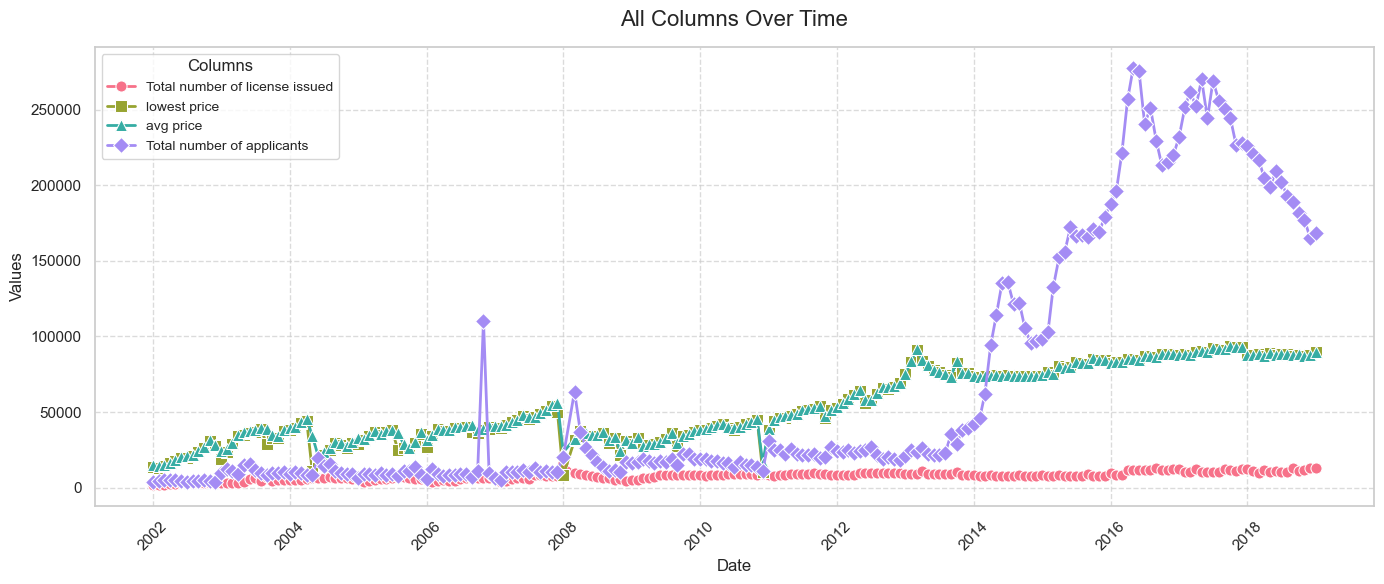

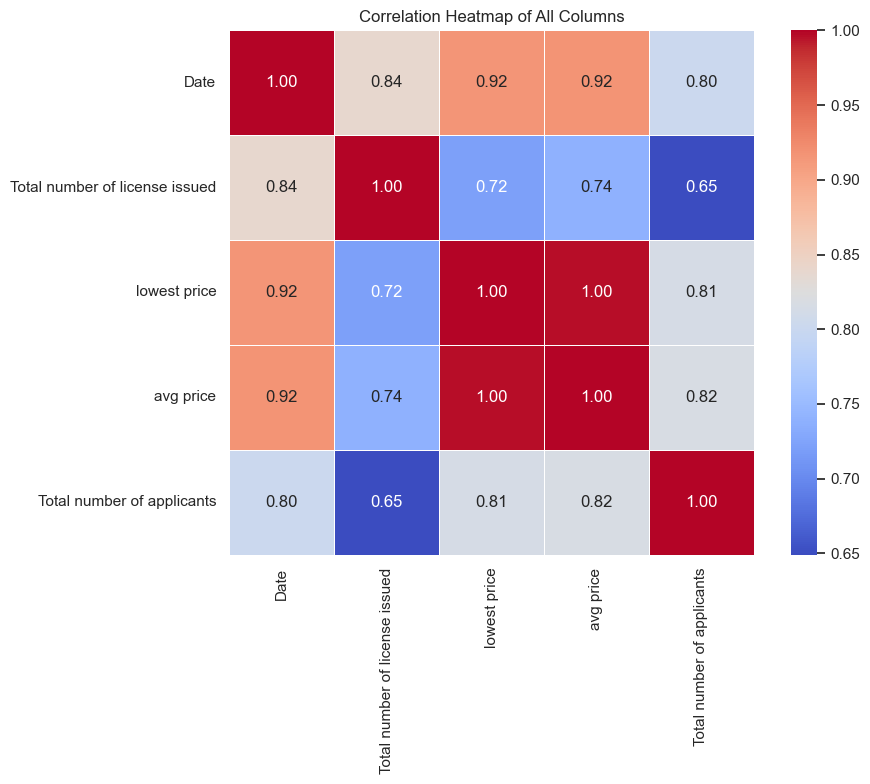

In [48]:
# ------------------------------
# 1.3. Combined Plot for All Columns
# ------------------------------
# Define markers and colors for each column
markers = ['o', 's', '^', 'D', 'x', 'p']
colors = sns.color_palette("husl", len(numeric_cols))  # Use distinct colors from husl palette

# Create a combined line plot
plt.figure(figsize=(14, 6))
for col, marker, color in zip(numeric_cols, markers, colors):
    sns.lineplot(data=df, x='Date', y=col, marker=marker, label=col, 
                 linewidth=2, markersize=8, color=color)

# Customize the combined plot
plt.title('All Columns Over Time', fontsize=16, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Columns', loc='best', fontsize=10, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ------------------------------
# 1.4. Correlation Heatmap of All Columns
# ------------------------------
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of All Columns')
plt.tight_layout()
plt.show()

In [49]:
# ------------------------------
# 2. Split Data into Training and Validation Sets
# ------------------------------

from sklearn.model_selection import train_test_split, KFold

# ПАРАМЕТРИ (за потреби змінюйте)
TARGET = 'avg price'
TEST_SIZE = 0.2
RANDOM_STATE = 42
N_SPLITS = 4
SHUFFLE = True

# Перевірка, що df існує в просторі і має потрібні колонки
assert 'df' in globals(), "Перш ніж запускати, переконайся що DataFrame 'df' завантажений в середовище."
assert TARGET in df.columns, f"Колонка '{TARGET}' відсутня у df."

# Підготовка X та y (без видалення або масштабування тут)
X = df.drop(['Date', TARGET], axis=1).copy()
y = df[TARGET].copy()

# Трансформація фічі з метою зменшення впливу викидів
if 'Total number of applicants' in X.columns:
    X['Total number of applicants'] = np.log1p(X['Total number of applicants'])

# 1) Hold-out split 80/20 (для остаточної перевірки)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=SHUFFLE
)

print('Hold-out:')
print('  Training set shape:', X_train.shape, y_train.shape)
print('  Validation set shape:', X_val.shape, y_val.shape)
print('='*60)

# 2) K-Fold (створюємо список folds із реальними DataFrame/Series — зручно для подальшого ручного тренування/перевірки)
cv_scheme = KFold(n_splits=N_SPLITS, shuffle=SHUFFLE, random_state=RANDOM_STATE)

folds = []
for fold_idx, (train_idx, val_idx) in enumerate(cv_scheme.split(X), start=1):
    X_train_k = X.iloc[train_idx].reset_index(drop=True)
    X_val_k   = X.iloc[val_idx].reset_index(drop=True)
    y_train_k = y.iloc[train_idx].reset_index(drop=True)
    y_val_k   = y.iloc[val_idx].reset_index(drop=True)
    folds.append((X_train_k, X_val_k, y_train_k, y_val_k))
    print(f"Fold {fold_idx}: train {X_train_k.shape[0]} rows, val {X_val_k.shape[0]} rows")

print('='*60)
print("Saved as: X_train, X_val, y_train, y_val,  at  folds (list of 4 tuples).")

Hold-out:
  Training set shape: (163, 3) (163,)
  Validation set shape: (41, 3) (41,)
Fold 1: train 153 rows, val 51 rows
Fold 2: train 153 rows, val 51 rows
Fold 3: train 153 rows, val 51 rows
Fold 4: train 153 rows, val 51 rows
Saved as: X_train, X_val, y_train, y_val,  at  folds (list of 4 tuples).


In [50]:
# ------------------------------
# 3. Train SVR (poly) with GridSearch
# ------------------------------

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pickle  # optional for saving the model 

## ---- Data existence checks from Cell 1 ----
assert 'X_train' in globals() and 'X_val' in globals() and 'y_train' in globals() and 'y_val' in globals(), \
    "You must first run Cell 1 to create X_train, X_val, y_train, y_val."
assert 'folds' in globals() and len(folds) >= 1, "You must create 'folds' in Cell 1."

## ---- Build pipeline (all transformations inside pipeline!) ----
pipeline_inner = Pipeline([
    ('poly_feats', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='poly'))
])

# Target transformation (log) — built into wrapper
model = TransformedTargetRegressor(regressor=pipeline_inner, func=np.log1p, inverse_func=np.expm1)

## ---- Hyperparameter grid ----
param_grid = {
    'regressor__svr__degree': [2, 3],
    'regressor__svr__C': [0.1, 1, 10, 100],
    'regressor__svr__epsilon': [0.01, 0.05, 0.1],
    'regressor__svr__coef0': [0.0, 0.1, 1.0]
}

# CV for GridSearch
cv_for_grid = KFold(n_splits=4, shuffle=True, random_state=42)

grid = GridSearchCV(model, param_grid, cv=cv_for_grid, scoring='r2', n_jobs=-1, verbose=2, return_train_score=True)

## ---- 1) Train GridSearch on X_train ----
print("Running GridSearchCV on X_train (internal CV folds)...")
grid.fit(X_train, y_train)

print("\n=== Grid search finished ===")
print("Best params:", grid.best_params_)
print("Best CV R2 (on internal train folds):", grid.best_score_)

## ---- Get best model and its score on hold-out val ----
best_model = grid.best_estimator_

# Evaluation on hold-out (original scale)
y_pred_train = best_model.predict(X_train)
y_pred_val = best_model.predict(X_val)

def metrics_dict(y_true, y_pred):
    return {
        'r2': r2_score(y_true, y_pred),
        'mse': mean_squared_error(y_true, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_absolute_percentage_error(y_true, y_pred)
    }

print("\nMetrics on HOLD-OUT TRAIN:")
mt_train = metrics_dict(y_train, y_pred_train)
for k,v in mt_train.items(): print(f"  {k}: {v:.6f}")

print("\nMetrics on HOLD-OUT VAL:")
mt_val = metrics_dict(y_val, y_pred_val)
for k,v in mt_val.items(): print(f"  {k}: {v:.6f}")

## ---- 2) Manual check on folds (train/evaluate with best_params_) ----
print("\nRunning manual check on folds for stability...")

best_params = grid.best_params_
manual_scores = []

for i, (X_tr_k, X_val_k, y_tr_k, y_val_k) in enumerate(folds, start=1):
    pl = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=best_params['regressor__svr__degree'], include_bias=False)),
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='poly',
                    degree=best_params['regressor__svr__degree'],
                    C=best_params['regressor__svr__C'],
                    epsilon=best_params['regressor__svr__epsilon'],
                    coef0=best_params['regressor__svr__coef0']))
    ])
    wrapped = TransformedTargetRegressor(regressor=pl, func=np.log1p, inverse_func=np.expm1)

    # Train only on this fold
    wrapped.fit(X_tr_k, y_tr_k)

    # Evaluate on this fold's validation
    y_val_pred_k = wrapped.predict(X_val_k)
    r2_k = r2_score(y_val_k, y_val_pred_k)
    manual_scores.append(r2_k)
    print(f" Fold {i}: R2 on this fold's validation = {r2_k:.6f}")

manual_mean = np.mean(manual_scores)
manual_std = np.std(manual_scores)
print("\nManual folds R2 mean:", manual_mean, "std:", manual_std)

## ---- 3) Overfitting control ----
print("\n=== Overfitting control (comparison) ===")
print(" Grid.best_score_ (CV on X_train during GridSearch):", grid.best_score_)
print(" Manual folds mean R2:", manual_mean)
print(" Hold-out validation R2:", mt_val['r2'])

diff = grid.best_score_ - mt_val['r2']
if abs(diff) > 0.05:
    print("\nWARNING: Difference between CV (on train) and hold-out val R2 > 0.05. Possible overfitting or instability.")
else:
    print("\nOK: Difference between CV (on train) and hold-out val R2 is small (<=0.05) — no strong signs of overfitting.")

# Optional model saving
# If you want to save the best model to disk, you can use pickle:
# Uncomment if you want to save:
# with open('svr_poly_best_final.pkl', 'wb') as f:
#     pickle.dump(best_model, f)
# print("Best model saved to 'svr_poly_best_final.pkl' (pickle)")

Running GridSearchCV on X_train (internal CV folds)...
Fitting 4 folds for each of 72 candidates, totalling 288 fits

=== Grid search finished ===
Best params: {'regressor__svr__C': 0.1, 'regressor__svr__coef0': 1.0, 'regressor__svr__degree': 3, 'regressor__svr__epsilon': 0.01}
Best CV R2 (on internal train folds): 0.99193380725593

Metrics on HOLD-OUT TRAIN:
  r2: 0.994227
  mse: 3363454.745543
  rmse: 1833.972395
  mae: 736.684002
  mape: 0.019168

Metrics on HOLD-OUT VAL:
  r2: 0.998027
  mse: 942448.292340
  rmse: 970.797761
  mae: 699.088167
  mape: 0.014825

Running manual check on folds for stability...
 Fold 1: R2 on this fold's validation = 0.997823
 Fold 2: R2 on this fold's validation = 0.998629
 Fold 3: R2 on this fold's validation = 0.986424
 Fold 4: R2 on this fold's validation = 0.994350

Manual folds R2 mean: 0.9943067551145607 std: 0.0048265246107648055

=== Overfitting control (comparison) ===
 Grid.best_score_ (CV on X_train during GridSearch): 0.99193380725593
 Manu

In [51]:
# B. Кореляції
corrs = X.join(y).corr()[TARGET].drop(TARGET).abs().sort_values(ascending=False)
print("Top correlations (abs) with target:\n", corrs.head(10))
print("\nFeatures with abs(corr) > 0.95:\n", corrs[corrs>0.95])

# A. Перевірка наскільки 'lowest price' фізично збігається з таргетом
diff = df['avg price'] - df['lowest price']
print("mean absolute diff:", diff.abs().mean())
print("median abs diff:", diff.abs().median())
print("max abs diff:", diff.abs().max())
print("fraction exactly equal:", (diff==0).mean())  # доля точних збігів


Top correlations (abs) with target:
 lowest price                      0.995960
Total number of applicants        0.878824
Total number of license issued    0.738741
Name: avg price, dtype: float64

Features with abs(corr) > 0.95:
 lowest price    0.99596
Name: avg price, dtype: float64
mean absolute diff: 983.0441176470588
median abs diff: 422.0
max abs diff: 23426
fraction exactly equal: 0.0


Маємо цікаве спостереження: показник lowest price має майже тотожну кореляцію з avg price (|corr| ≈ 0.99596). Це пояснює отримані раніше надзвичайно високі значення R².

Різниця (avg price – lowest price): середня абсолютна ≈ 983, медіанна ≈ 422, максимум ≈ 23426, точних збігів немає (повних дублікатів немає, але значення дуже близькі).

Інші істотні кореляції: Total number of applicants (|corr| ≈ 0.818), Total number of license issued (|corr| ≈ 0.739).

Висновок: залежність між lowest price і avg price є настільки сильною, що використання lowest price у моделі створює ризик витоку даних або значного спрощення задачі прогнозування.

Подальші дії:
Прийнято рішення сформувати альтернативні датасети без показника lowest price та провести навчання моделей на такому очищеному наборі, щоб перевірити реальну прогностичну цінність інших ознак.

In [52]:
# ------------------------------
# 2.1. Split Data into Training and Validation Sets
# ------------------------------

# ПАРАМЕТРИ ТІ САМІ ЩО Й РАНІШЕ, ТУТ ПЕРЕВИЗНАЧЕНІ НЕ БУДУТЬ

# Перевірка, що df існує в просторі і має потрібні колонки
assert 'df' in globals(), "Перш ніж запускати, переконайся що DataFrame 'df' завантажений в середовище."
assert TARGET in df.columns, f"Колонка '{TARGET}' відсутня у df."

# Підготовка X та y (без видалення або масштабування тут)
X = df.drop(['Date', 'lowest price', TARGET], axis=1).copy()
y = df[TARGET].copy()

if 'Total number of applicants' in X.columns:
    X['Total number of applicants'] = np.log1p(X['Total number of applicants'])


# 1) Hold-out split 80/20 (для остаточної перевірки)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=SHUFFLE
)

print('Hold-out:')
print('  Training set shape:', X_train.shape, y_train.shape)
print('  Validation set shape:', X_val.shape, y_val.shape)
print('='*60)

# 2) K-Fold (створюємо список folds із реальними DataFrame/Series — зручно для подальшого ручного тренування/перевірки)
cv_scheme = KFold(n_splits=N_SPLITS, shuffle=SHUFFLE, random_state=RANDOM_STATE)

folds = []
for fold_idx, (train_idx, val_idx) in enumerate(cv_scheme.split(X), start=1):
    X_train_k = X.iloc[train_idx].reset_index(drop=True)
    X_val_k   = X.iloc[val_idx].reset_index(drop=True)
    y_train_k = y.iloc[train_idx].reset_index(drop=True)
    y_val_k   = y.iloc[val_idx].reset_index(drop=True)
    folds.append((X_train_k, X_val_k, y_train_k, y_val_k))
    print(f"Fold {fold_idx}: train {X_train_k.shape[0]} rows, val {X_val_k.shape[0]} rows")

print('='*60)
print("Saved as: X_train, X_val, y_train, y_val,  at  folds (list of 4 tuples).")

Hold-out:
  Training set shape: (163, 2) (163,)
  Validation set shape: (41, 2) (41,)
Fold 1: train 153 rows, val 51 rows
Fold 2: train 153 rows, val 51 rows
Fold 3: train 153 rows, val 51 rows
Fold 4: train 153 rows, val 51 rows
Saved as: X_train, X_val, y_train, y_val,  at  folds (list of 4 tuples).


In [53]:
# ------------------------------
# 3.1. Train SVR (poly) with GridSearch (SVR-only cell, formatted outputs)
# ------------------------------

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

## ---- Data existence checks from Cell 1 ----
assert 'X_train' in globals() and 'X_val' in globals() and 'y_train' in globals() and 'y_val' in globals(), \
    "You must first run the split cell to create X_train, X_val, y_train, y_val."
assert 'folds' in globals() and len(folds) >= 1, "You must create 'folds' in the split cell."

## ---- Utility: winsorize (1% / 99%) ----
def winsorize_df(df_in, lower_p=0.01, upper_p=0.99):
    df_out = df_in.copy()
    for col in df_out.select_dtypes(include=[np.number]).columns:
        low = df_out[col].quantile(lower_p)
        high = df_out[col].quantile(upper_p)
        df_out[col] = df_out[col].clip(lower=low, upper=high)
    return df_out

# Create winsorized copies for stability (won't overwrite originals)
X_train_w = winsorize_df(X_train, 0.01, 0.99)
X_val_w   = winsorize_df(X_val, 0.01, 0.99)

## ---- Build pipeline (all transformations inside pipeline!) ----
pipeline_inner = Pipeline([
    ('poly_feats', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', RobustScaler()),        # RobustScaler used for stability against outliers
    ('svr', SVR(kernel='poly'))
])

# Target transformation (log) — built into wrapper
model = TransformedTargetRegressor(regressor=pipeline_inner, func=np.log1p, inverse_func=np.expm1)

## ---- Hyperparameter grid ----
param_grid = {
    'regressor__svr__degree': [2, 3],
    'regressor__svr__C': [0.01, 0.1, 1, 10],
    'regressor__svr__epsilon': [0.01, 0.05, 0.1],
    'regressor__svr__coef0': [0.0, 0.1]
}

# CV for GridSearch
cv_for_grid = KFold(n_splits=4, shuffle=True, random_state=42)

grid = GridSearchCV(model, param_grid, cv=cv_for_grid, scoring='r2', n_jobs=-1, verbose=2, return_train_score=True)

## ---- 1) Train GridSearch on X_train (winsorized) ----
print("Running GridSearchCV on X_train (internal CV folds)...")
grid.fit(X_train_w, y_train)

print("\n=== Grid search finished ===")
print("Best params:", grid.best_params_)
print("Best CV R2 (on internal train folds):", grid.best_score_)

## ---- Get best model and its score on hold-out val ----
best_model = grid.best_estimator_

# Evaluation on hold-out (original scale; using winsorized X for consistent preprocessing)
y_pred_train = best_model.predict(X_train_w)
y_pred_val = best_model.predict(X_val_w)

def metrics_dict(y_true, y_pred):
    return {
        'r2': r2_score(y_true, y_pred),
        'mse': mean_squared_error(y_true, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_absolute_percentage_error(y_true, y_pred)
    }

print("\nMetrics on HOLD-OUT TRAIN:")
mt_train = metrics_dict(y_train, y_pred_train)
for k,v in mt_train.items(): print(f"  {k}: {v:.6f}")

print("\nMetrics on HOLD-OUT VAL:")
mt_val = metrics_dict(y_val, y_pred_val)
for k,v in mt_val.items(): print(f"  {k}: {v:.6f}")

## ---- 2) Manual check on folds (train/evaluate with best_params_) ----
print("\nRunning manual check on folds for stability...")

best_params = grid.best_params_
manual_scores = []

for i, (X_tr_k, X_val_k, y_tr_k, y_val_k) in enumerate(folds, start=1):
    # winsorize per-fold to keep preprocessing identical
    X_tr_k_w = winsorize_df(X_tr_k, 0.01, 0.99)
    X_val_k_w = winsorize_df(X_val_k, 0.01, 0.99)

    pl = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=best_params['regressor__svr__degree'], include_bias=False)),
        ('scaler', RobustScaler()),
        ('svr', SVR(kernel='poly',
                    degree=best_params['regressor__svr__degree'],
                    C=best_params['regressor__svr__C'],
                    epsilon=best_params['regressor__svr__epsilon'],
                    coef0=best_params['regressor__svr__coef0']))
    ])
    wrapped = TransformedTargetRegressor(regressor=pl, func=np.log1p, inverse_func=np.expm1)

    # Train only on this fold
    wrapped.fit(X_tr_k_w, y_tr_k)

    # Evaluate on this fold's validation
    y_val_pred_k = wrapped.predict(X_val_k_w)
    r2_k = r2_score(y_val_k, y_val_pred_k)
    manual_scores.append(r2_k)
    print(f" Fold {i}: R2 on this fold's validation = {r2_k:.6f}")

manual_mean = np.mean(manual_scores)
manual_std = np.std(manual_scores)
print("\nManual folds R2 mean:", manual_mean, "std:", manual_std)

## ---- 3) Overfitting control ----
print("\n=== Overfitting control (comparison) ===")
print(" Grid.best_score_ (CV on X_train during GridSearch):", grid.best_score_)
print(" Manual folds mean R2:", manual_mean)
print(" Hold-out validation R2:", mt_val['r2'])

diff = grid.best_score_ - mt_val['r2']
if abs(diff) > 0.05:
    print("\nWARNING: Difference between CV (on train) and hold-out val R2 > 0.05. Possible overfitting or instability.")
else:
    print("\nOK: Difference between CV (on train) and hold-out val R2 is small (<=0.05) — no strong signs of overfitting.")

# Optional model saving (pickle)
# with open('svr_poly_best_winsorized.pkl', 'wb') as f:
#     pickle.dump(best_model, f)
# print("Best model saved to 'svr_poly_best_winsorized.pkl' (pickle)")


Running GridSearchCV on X_train (internal CV folds)...
Fitting 4 folds for each of 48 candidates, totalling 192 fits

=== Grid search finished ===
Best params: {'regressor__svr__C': 1, 'regressor__svr__coef0': 0.1, 'regressor__svr__degree': 2, 'regressor__svr__epsilon': 0.01}
Best CV R2 (on internal train folds): 0.7744781342712034

Metrics on HOLD-OUT TRAIN:
  r2: 0.807630
  mse: 112084372.601081
  rmse: 10586.990725
  mae: 7242.974833
  mape: 0.174590

Metrics on HOLD-OUT VAL:
  r2: 0.672879
  mse: 156286997.405580
  rmse: 12501.479809
  mae: 9229.865044
  mape: 0.189457

Running manual check on folds for stability...
 Fold 1: R2 on this fold's validation = 0.707094
 Fold 2: R2 on this fold's validation = 0.821875
 Fold 3: R2 on this fold's validation = 0.838378
 Fold 4: R2 on this fold's validation = 0.381134

Manual folds R2 mean: 0.687120115755349 std: 0.18375554282834075

=== Overfitting control (comparison) ===
 Grid.best_score_ (CV on X_train during GridSearch): 0.7744781342712